In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.colors
import numpy as np
import glob
import re 



In [2]:
# file_base = 'data/Fun4All_G4_EICDetector_MaterialScan_'
file_base = 'data/Fun4All_G4_EICDetector_MaterialScan2_'

filenames = glob.glob(os.path.join(f'{file_base}*.log'))
print(len(filenames))
filenames.sort();

DataSetLables = {
    1: 'Vacuum',
    2: 'Mar-2020 beam chamber',
    3: 'MAPS vertex tracker',
    4: 'TPC (field cage+gas)',
    5: 'Forward/backward GEMs',
    6: 'Forward silicon tracker',
    7: 'DIRC',
    8: 'HBD-GEM Gas RICH',    
    9: 'mRICH AeroGel',
    10: 'All Tracker+PIC'
};
print(DataSetLables)

CautiousLabel = 'TPC end-cap, cable and air excluded'

mpl.style.use('seaborn-talk')

10
{1: 'Vacuum', 2: 'Mar-2020 beam chamber', 3: 'MAPS vertex tracker', 4: 'TPC (field cage+gas)', 5: 'Forward/backward GEMs', 6: 'Forward silicon tracker', 7: 'DIRC', 8: 'HBD-GEM Gas RICH', 9: 'mRICH AeroGel', 10: 'All Tracker+PIC'}


In [3]:
temp = re.compile("^\s+([-+]?\d*\.?\d*)\s+([-+]?\d*\.?\d*)\s+([-+]?\d*\.?\d*)\s+([-+]?\d*\.?\d*)\s+([-+]?\d*\.?\d*)\s*$") 
Setups = [];
Thetas = [];
Phis = [];
Lengths = [];
x0s = [];
lambda0s = [];

for filename in filenames:
    
    filename_base = os.path.basename(filename)
    
    setupID = int(filename_base.split('.')[0].split('_')[-1]);
    
    if setupID>=10 :
        print(f'Skip {setupID}: {filename}')
        continue;
    
    cnt = 0;
    file1 = open(filename, 'r') 
    Lines = file1.readlines() 
    for line in Lines: 
    #     line = line.strip();  

        match = temp.match(line) 

        if match:
            res = match.groups()
            if (len(res) == 5):

    #             print (line)
    #             print (res)            
                scanData = [float(n) for n in res]

                if (scanData[1]<=360 ):
                    Setups.append(setupID) 
                    Thetas.append(scanData[0]) 
                    Phis.append(scanData[1]) 
                    Lengths.append(scanData[2]) 
                    x0s.append(scanData[3]) 
                    lambda0s.append(scanData[4]) 

                    cnt = cnt +1
                
    print(f'{setupID}: {filename} -> {cnt} records')
    
    


1: data/Fun4All_G4_EICDetector_MaterialScan2_1.log -> 0 records
Skip 10: data/Fun4All_G4_EICDetector_MaterialScan2_10.log
2: data/Fun4All_G4_EICDetector_MaterialScan2_2.log -> 43237 records
3: data/Fun4All_G4_EICDetector_MaterialScan2_3.log -> 43237 records
4: data/Fun4All_G4_EICDetector_MaterialScan2_4.log -> 43237 records
5: data/Fun4All_G4_EICDetector_MaterialScan2_5.log -> 43237 records
6: data/Fun4All_G4_EICDetector_MaterialScan2_6.log -> 43237 records
7: data/Fun4All_G4_EICDetector_MaterialScan2_7.log -> 43237 records
8: data/Fun4All_G4_EICDetector_MaterialScan2_8.log -> 43237 records
9: data/Fun4All_G4_EICDetector_MaterialScan2_9.log -> 43237 records


In [4]:
df = pd.DataFrame(
    {'Setup':Setups, 
     'Theta':Thetas,
     'Phi': Phis,
     'Length': Lengths,
     'x0':x0s,
     'lambda0':lambda0s,
    });
df.set_index(['Setup','Theta','Phi'], inplace=True)
df.sort_index(level = 2)

df

Length        x0   lambda0
Setup Theta    Phi                                   
2     -88.4453 3.00000    5001.84  0.974454  0.222887
               6.56436    5001.84  1.055810  0.241495
               10.12870   5001.84  1.275260  0.291691
               13.69310   5001.84  1.405170  0.321406
               17.25740   5001.84  1.662950  0.380368
...                           ...       ...       ...
9      88.4453 309.53500  5001.84  0.407671  0.093247
               313.09900  5001.84  0.420933  0.096280
               316.66300  5001.84  0.413852  0.094660
               320.22800  5001.84  0.405821  0.092824
               323.79200  5001.84  0.419037  0.095846

[345896 rows x 3 columns]

In [5]:
print(df.index.levels[0].unique())
print(df.index.levels[1].unique())
print(df.index.levels[2].unique())



Int64Index([2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='Setup')
Float64Index([-88.4453, -88.4138, -88.3818, -88.3491, -88.3158, -88.2818,
              -88.2471, -88.2117, -88.1755, -88.1387,
              ...
               88.1387,  88.1755,  88.2117,  88.2471,  88.2818,  88.3158,
               88.3491,  88.3818,  88.4138,  88.4453],
             dtype='float64', name='Theta', length=431)
Float64Index([    3.0, 6.56436, 10.1287, 13.6931, 17.2574, 20.8218, 24.3861,
              27.9505, 31.5149, 35.0792,
              ...
              327.356, 330.921, 334.485,  338.05, 341.614, 345.178, 348.743,
              352.307, 355.871, 359.436],
             dtype='float64', name='Phi', length=101)


In [6]:
# ave = df.loc[(9,0),:].mean(axis = 0) 

In [7]:
# x0_avg = df.loc[(9),:].groupby('Theta').x0.mean()

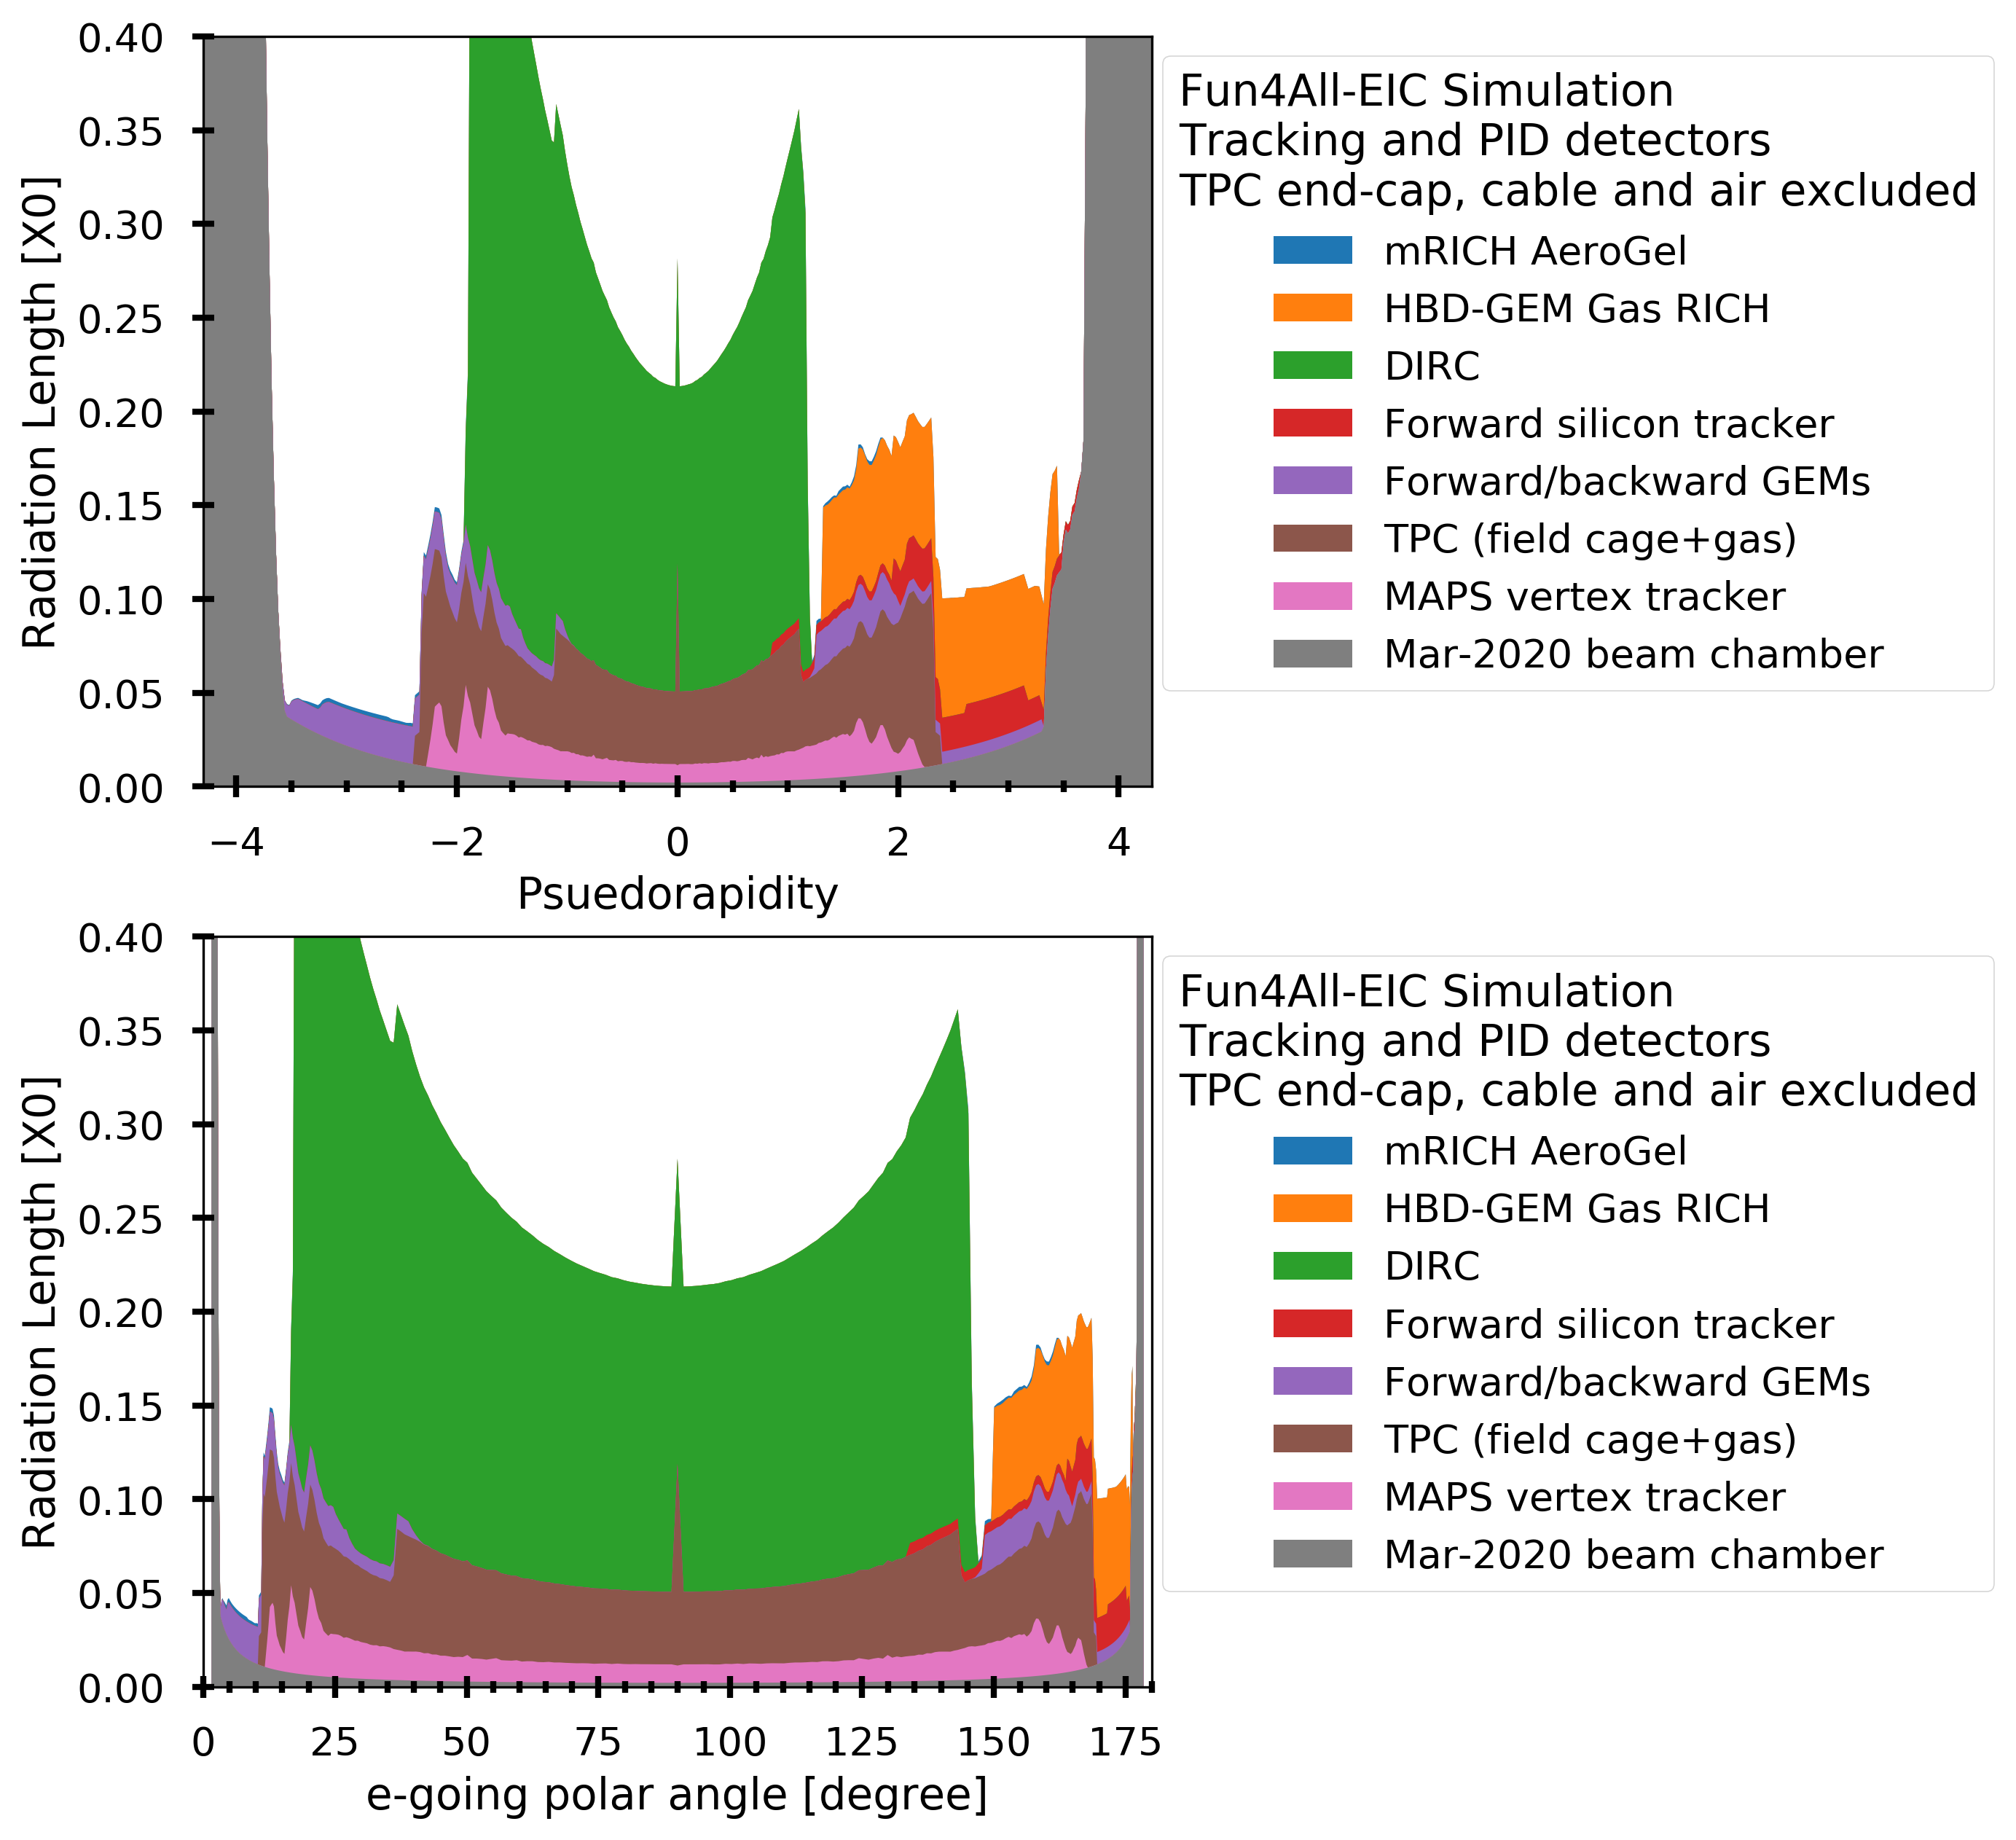

In [15]:
# fig= plt.figure(num=None, figsize=(8, 16), dpi=80, facecolor='w', edgecolor='k')
# ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 10), dpi=300)



datasets = sorted(df.index.levels[0].unique().to_list(), reverse=True)

for dataset in datasets:
    
    x0_avg = df.loc[(dataset),:].groupby('Theta').x0.mean()
    etas = -np.log(np.tan( ((90-x0_avg.index.to_numpy())/180*np.pi)/2 ))
    polar_angles = 180- ( 90-x0_avg.index.to_numpy() )
    DataSetLable = DataSetLables[dataset]
    
    axs[0].fill_between( etas, 0, x0_avg.to_numpy(), label=DataSetLable)
    
    axs[1].fill_between( polar_angles, 0, x0_avg.to_numpy(), label=DataSetLable)
   

ax=axs[0]
    
# ax.set_title(f'Fun4All-EIC Simulation. Tracking and PID detectors\n{CautiousLabel}')
# ax.set_yscale('log')
ax.set_xlabel("Psuedorapidity")
ax.set_ylabel("Radiation Length [X0]")
ax.set_xlim([-4.3, 4.3]);
ax.set_ylim([0, 0.4]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = f'Fun4All-EIC Simulation\nTracking and PID detectors\n{CautiousLabel}',
         title_fontsize='x-large'
         )

ax=axs[1]
    
# ax.set_title('Raditioan Length Scans')
# ax.set_yscale('log')
ax.set_xlabel("e-going polar angle [degree]")
ax.set_ylabel("Radiation Length [X0]")
ax.set_xlim([0, 180]);
ax.set_ylim([0, 0.4]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = f'Fun4All-EIC Simulation\nTracking and PID detectors\n{CautiousLabel}',
         title_fontsize='x-large'
         )

plt.savefig(os.path.join(f'{file_base}_Raditioan_Length.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(f'{file_base}_Raditioan_Length.png'), bbox_inches='tight')

In [9]:
import pylab
F = pylab.gcf()
DefaultSize = F.get_size_inches()


<Figure size 748.8x514.8 with 0 Axes>

In [10]:
print(sorted(df.index.levels[0].unique().to_list(), reverse=True))

[9, 8, 7, 6, 5, 4, 3, 2]


In [11]:
((90-x0_avg.index.to_numpy())/180*np.pi)/2

array([1.55722901, 1.55695412, 1.55667487, 1.55638951, 1.55609891,
       1.5558022 , 1.55549939, 1.55519047, 1.55487456, 1.55455342,
       1.5542253 , 1.55389019, 1.55354898, 1.55320079, 1.55284562,
       1.55248259, 1.55211258, 1.55173559, 1.55135074, 1.55095804,
       1.55055749, 1.55014821, 1.54973108, 1.54930609, 1.54887237,
       1.54842906, 1.54797789, 1.54751713, 1.54704676, 1.54656679,
       1.5460781 , 1.54557894, 1.5450693 , 1.54455007, 1.54402036,
       1.54347931, 1.54292778, 1.54236491, 1.5417907 , 1.54120514,
       1.54060824, 1.53999825, 1.53937691, 1.53874248, 1.53809584,
       1.53743523, 1.53676241, 1.53607475, 1.535374  , 1.53465928,
       1.53392974, 1.53318623, 1.53242701, 1.53165208, 1.53086232,
       1.53005685, 1.5292348 , 1.52839617, 1.52754096, 1.52666742,
       1.5257773 , 1.52486973, 1.52394296, 1.52299787, 1.52203357,
       1.52105008, 1.52004739, 1.51902375, 1.51798005, 1.51691452,
       1.51582893, 1.51472064, 1.51358967, 1.51243688, 1.51126

In [12]:
dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_